#📋 Contextualização do Projeto

Fui contratada como **Assistente de Analista de Dados** na equipe de **Data Science** da empresa de telecomunicações **TelecomX**, com o objetivo inicial de apoiar um novo projeto estratégico denominado “Churn de Clientes”.<br>
A empresa enfrenta um elevado índice de evasão de clientes, sem uma compreensão clara dos fatores que contribuem para esse comportamento. Minhas atribuições iniciais incluíram:

- Coleta e organização dos dados internos;
- Tratamento e limpeza dos dados;
- Realização de análise exploratória.<br>

Devido à minha dedicação, capacidade analítica e visão estratégica, fui promovida ao cargo de **Cientista de Dados**. Com essa nova responsabilidade, iniciarei análises voltadas à previsão de casos futuros de churn, utilizando abordagens preditivas e modelos estatísticos.

--------------------------

#🔍 Próximos Passos
Considerando que a etapa de tratamento de dados já foi concluída, a nova fase da análise será conduzida a partir da **planilha de dados tratados**, com o objetivo de:
- 	Identificar padrões comportamentais;
- 	Construir modelos preditivos de churn;
- 	Propor estratégias de retenção baseadas em dados.<br><p>
<br>

📁 <u>**Referência Técnica:**</u><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Toda a documentação referente às etapas anteriores do projeto está disponível em: [TelecomX - Cris Cesare](https://github.com/CrisCesare/Challenge_TelecomX)

#📊 Carga

In [1]:
import pandas as pd

dados = pd.read_csv('/content/dados_tratados.csv')
dados.head()

,clienteID,perdaCliente,genero,pessoaIdosa,conjuge,dependentes,duracaoContrato,servicoTelefone,multiplasLinhas,servicoInternet,...,protecaoDispositivo,suporteTecnico,servicoTV,servicoFilmes,tipoContrato,faturaOnline,metodoPagamento,custoMensal,custoTotal,custoDiario
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#🛠️ Preparação dos Dados

In [2]:
#Removendo colunas irrelevantes
dados = dados.drop(['clienteID', 'custoDiario'], axis=1)

#Relembrando os valores únicos de cada coluna
for col in dados.columns:
  print(f"Valores únicos da coluna'{col}': {dados[col].nunique()}")
  if dados[col].nunique() > 50:
    print('-' * 50)
  else:
    print(dados[col].unique())
    print('-' * 50)

Valores únicos da coluna'perdaCliente': 2
[0 1]
--------------------------------------------------
Valores únicos da coluna'genero': 2
['Female' 'Male']
--------------------------------------------------
Valores únicos da coluna'pessoaIdosa': 2
[0 1]
--------------------------------------------------
Valores únicos da coluna'conjuge': 2
[1 0]
--------------------------------------------------
Valores únicos da coluna'dependentes': 2
[1 0]
--------------------------------------------------
Valores únicos da coluna'duracaoContrato': 73
--------------------------------------------------
Valores únicos da coluna'servicoTelefone': 2
[1 0]
--------------------------------------------------
Valores únicos da coluna'multiplasLinhas': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores únicos da coluna'servicoInternet': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Valores únicos da coluna'protecaoOnline': 3
['No' 'Yes' 

In [3]:
#Definindo a variável alvo
x = dados.drop('perdaCliente', axis=1)
y = dados['perdaCliente']

#Transformando as variáveis categóricas em formato númerico
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas = x.columns

one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['genero','multiplasLinhas','servicoInternet','protecaoOnline','backupOnline','protecaoDispositivo','suporteTecnico','servicoTV','servicoFilmes','tipoContrato','metodoPagamento']
),
    remainder = 'passthrough',
    sparse_threshold=0)

x = one_hot.fit_transform(x)

In [4]:
#Verificando a transformação
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__genero_Male,onehotencoder__multiplasLinhas_No,onehotencoder__multiplasLinhas_No phone service,onehotencoder__multiplasLinhas_Yes,onehotencoder__servicoInternet_DSL,onehotencoder__servicoInternet_Fiber optic,onehotencoder__servicoInternet_No,onehotencoder__protecaoOnline_No,onehotencoder__protecaoOnline_No internet service,onehotencoder__protecaoOnline_Yes,...,onehotencoder__metodoPagamento_Electronic check,onehotencoder__metodoPagamento_Mailed check,remainder__pessoaIdosa,remainder__conjuge,remainder__dependentes,remainder__duracaoContrato,remainder__servicoTelefone,remainder__faturaOnline,remainder__custoMensal,remainder__custoTotal
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75
7041,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65


In [5]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Cálculo da proporção de clientes que evadiram
contagem = dados['perdaCliente'].value_counts().sort_index()
porcentagem = round(contagem / contagem.sum() * 100, 1)

plt = contagem.reset_index()
plt.columns = ['perdaCliente', 'Quantidade']
plt['Label'] = plt['perdaCliente'].map({0: 'Ativos', 1: 'Evadiram'})
plt['Texto'] = '<b>' + plt['Quantidade'].astype(str) + ' (' + porcentagem.astype(str) + '%)'

fig = px.bar(
    plt,
    x='Label',
    y='Quantidade',
    text='Texto',
    color='Label',
    color_discrete_map={'Ativos': 'light blue', 'Evadiram': 'orange'},
    title='Distribuição de Clientes por Evasão'
).update_layout(
    xaxis_title=None, yaxis_title=None,
    title_x=0.5,
    title_font=dict(size=20),
    showlegend=False
)

fig.show()

In [6]:
#Balançando os dados com a estratégia Oversampling com o método SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [7]:
#Definindo os dados para Treino e Teste
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x_balanceado, y_balanceado, test_size=0.2, stratify = y_balanceado, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, random_state=5)

In [8]:
#Normalização do dados
from sklearn.preprocessing import MinMaxScaler

normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x)

#🎯 Correlação e Seleção de Variáveis

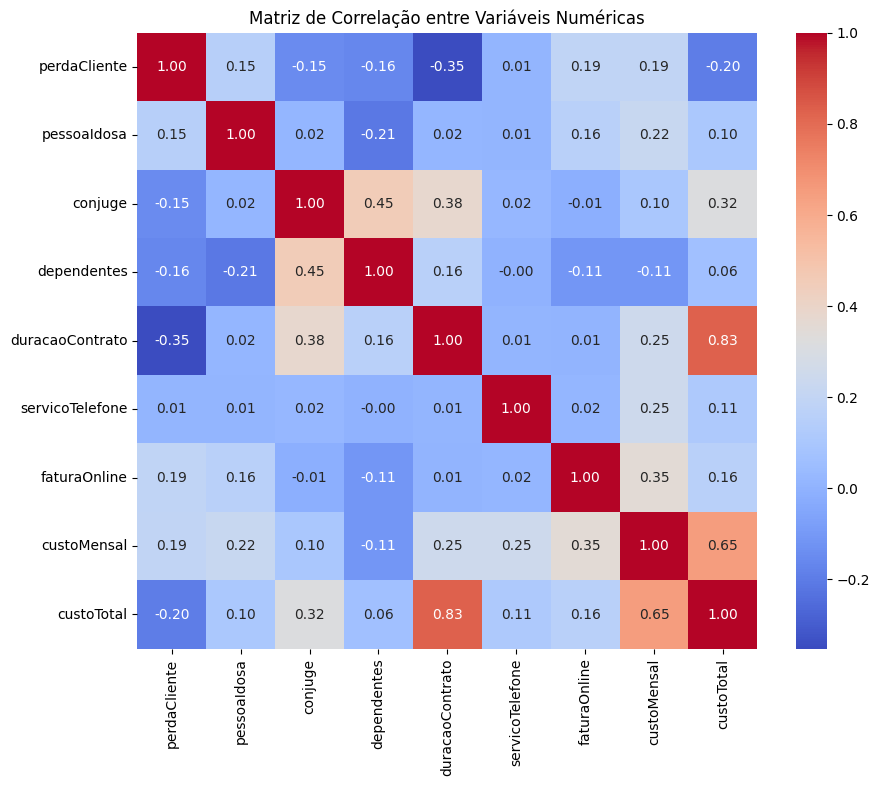

In [9]:
#Analisando correlação
colunas_numericas = dados.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
matriz_correlacao = colunas_numericas.corr()

# Visualizar a correlação com a variável alvo
correlacao_com_evasao = matriz_correlacao['perdaCliente'].sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

In [10]:
#Analisando Tempo de Contrato x Evasão

px.box(dados, x = 'duracaoContrato', color = dados['perdaCliente'].map({0: 'Ativos', 1: 'Evadiram'}), title='Tempo de Contrato x Evasão').update_layout(title_x=0.5)

In [11]:
#Analisando Total Gasto x Evasão

px.box(dados, x = 'custoTotal', color = dados['perdaCliente'].map({0: 'Ativos', 1: 'Evadiram'}), title='Total Gasto x Evasão').update_layout(title_x=0.5)

#🤖 Modelagem Preditiva

In [12]:
#Criação de modelos

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(x_treino_normalizado, y)

x_teste_normalizado = normalizacao.transform(x_teste)

print(f'Acurácia de treino: {knn.score(x_treino_normalizado, y)}')
print(f'Acurácia de teste: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia de treino: 0.9983087702343562
Acurácia de teste: 0.8149758454106281


In [13]:
#Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth = 10, random_state=5)
modelo.fit(x_treino, y_treino)

print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')
print(f'Acurácia de teste: {modelo.score(x_teste, y_teste)}')

Acurácia de treino: 0.8877255154639175
Acurácia de validação: 0.8318840579710145
Acurácia de teste: 0.8256038647342995


Modelo KNN:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1035
           1       0.78      0.88      0.83      1035

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



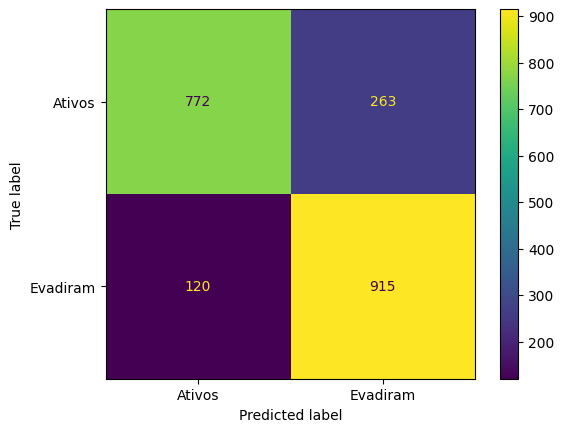

In [14]:
#Métricas de Avaliação
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Knn
y_prev_knn = knn.predict(x_teste_normalizado)
matriz_confusao_knn = confusion_matrix(y_teste, y_prev_knn)

visualizacao_knn = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_knn, display_labels=['Ativos','Evadiram'])
visualizacao_knn.plot();

print("Modelo KNN:")
print(classification_report(y_teste, y_prev_knn))

Modelo Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1035
           1       0.82      0.83      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



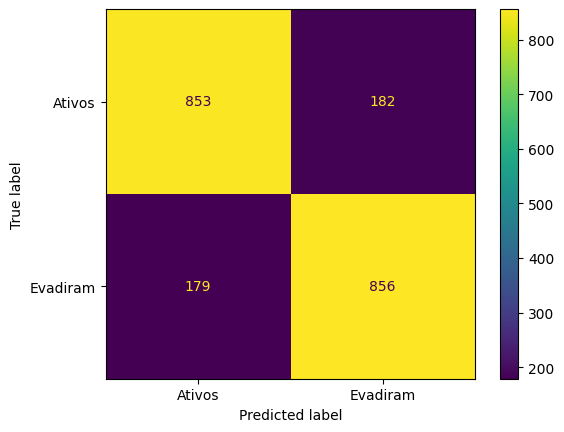

In [15]:
#Árvore de Decisão

y_previsto = modelo.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_previsto)

visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Ativos','Evadiram'])
visualizacao.plot();

print("Modelo Árvore de Decisão:")
print(classification_report(y_teste, y_previsto))

#📋  Interpretação e Conclusões

In [16]:
dados['perdaCliente'].value_counts(normalize=True)

,proportion
perdaCliente,
0,0.73463
1,0.26537


In [17]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import scipy.stats as st

# Função para calcular intervalo de confiança
def intervalo_conf(resultados, nivel=0.95):
    valores = resultados['test_score']
    media = np.mean(valores)
    desvio = np.std(valores, ddof=1)
    n = len(valores)
    intervalo = st.t.interval(nivel, df=n-1, loc=media, scale=desvio/np.sqrt(n))
    return intervalo

# Modelos
modelo_knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
modelo_arvore = DecisionTreeClassifier(max_depth=10, random_state=5)

# K-Fold estratificado
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Avaliação com cross_validate
resultado_knn = cross_validate(modelo_knn, x, y, cv=skf, scoring='recall')
resultado_arvore = cross_validate(modelo_arvore, x, y, cv=skf, scoring='recall')

#Média
media_knn = np.mean(resultado_knn['test_score'])
media_arvore = np.mean(resultado_arvore['test_score'])

# Intervalos de confiança
ic_knn = intervalo_conf(resultado_knn)
ic_arvore = intervalo_conf(resultado_arvore)

# Exibição formatada
print(f'Recall médio KNN: {media_knn:.4f}')
print(f'Intervalo de confiança KNN (Recall): [{ic_knn[0]:.4f}, {ic_knn[1]:.4f}]')
print('-' * 50)
print(f'Recall médio Árvore de Decisão: {media_arvore:.4f}')
print(f'Intervalo de confiança Árvore de Decisão (Recall): [{ic_arvore[0]:.4f}, {ic_arvore[1]:.4f}]')

Recall médio KNN: 0.8444
Intervalo de confiança KNN (Recall): [0.8220, 0.8668]
--------------------------------------------------
Recall médio Árvore de Decisão: 0.8261
Intervalo de confiança Árvore de Decisão (Recall): [0.8041, 0.8480]


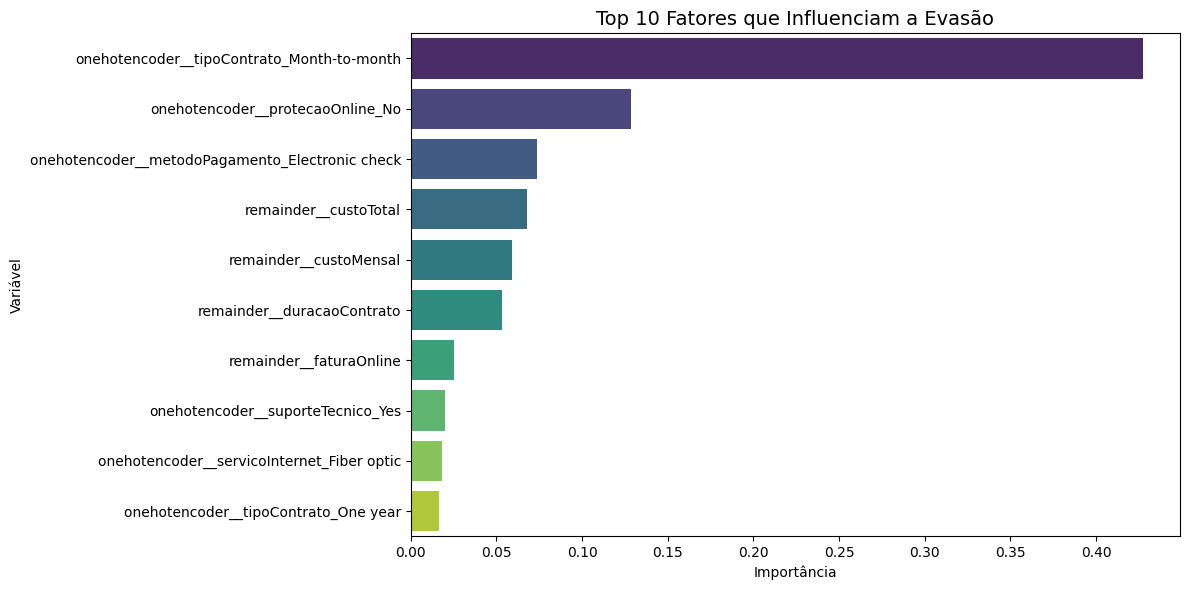

In [18]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10, random_state=5)
modelo.fit(x_treino, y_treino)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recuperando os nomes das colunas após o OneHotEncoder
nomes_variaveis = one_hot.get_feature_names_out(colunas)

# Organizando em DataFrame
df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': modelo.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Visualizando os principais fatores
plt.figure(figsize=(12, 6))
sns.barplot(x='Importância', y='Variável', hue='Variável', data=df_importancia.head(10), palette='viridis')
plt.title('Top 10 Fatores que Influenciam a Evasão', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show();


#🚀 Conclusão
------

##🔧 Justificativa dos Modelos Utilizado

Foram escolhidos dois modelos com características complementares:<br><p>
- **K-Nearest Neighbors (KNN):** Modelo baseado em distância, ideal para detectar comportamentos semelhantes entre clientes. Sua simplicidade e capacidade de adaptação a dados balanceados o tornam útil para problemas de classificação binária como evasão.<p>
-**Árvore de Decisão:** Modelo interpretável, capaz de lidar com variáveis categóricas e identificar regras claras de decisão. Excelente para extrair insights sobre os fatores que influenciam a evasão.<br>

------
##🥇 Melhor Desempenho

Ambos os modelos apresentaram desempenho semelhante, mas o **KNN teve recall superior na classe de evasão**, o que é desejável em cenários onde o objetivo é **identificar clientes em risco**. No entanto, a Árvore de Decisão apresentou **maior equilíbrio entre as classes** e **melhor interpretabilidade**, sendo mais adequada para aplicação prática e tomada de decisão.<br>

------
##⚠️ Diagnóstico de Overfitting e Underfittin

O modelo KNN deu indícios de overfitting, pois o modelo memoriza os dados de treino e perde capacidade de generalização. Foi testado os números de vizinho e equilibrado com ponderação de distância e foi utilizado o que possuía o melhor equilíbrio entre precisão e revocação.<br>

------
##🔍 Análise das Variáveis Mais Relevante

A partir da Árvore de Decisão, foram identificadas as variáveis com maior impacto na evasão:
- **Contrato Month-to-month:** Clientes com contratos mensais têm maior propensão à evasão;
- **Pagamento via Electronic Check:** Pode indicar menor engajamento ou instabilidade financeira;
- **Duração do contrato:** Quanto maior o vínculo, menor a chance de evasão;
- **Custo total:** Clientes com menor gasto acumulado tendem a sair mais rápido;
- **Sem proteção online / suporte técnico:** A ausência desses serviços reduz o valor percebido.<br>

------
##🎯 Estratégias de Retenção Baseadas nos Resultado

1. **Segmentação de risco:** Monitorar clientes com contratos mensais e baixo custo total;
2. **Campanhas de fidelização:** Incentivar migração para contratos anuais ou bienais com benefícios exclusivos;
3. **Valorização de serviços adicionais:** Destacar o valor de suporte técnico, proteção online e entretenimento. Como estratégia, oferecer no primeiro mês o suporte técnico gratuitamente e desconto exclusivo para proteção online e entretenimento;
4. **Ajuste nos métodos de pagamento:** Promover opções automáticas que aumentam a permanência;
5. **Integração dos modelos preditivos:** Aplicar a árvore de decisão em sistemas de CRM para alertas em tempo real.<br>

------
##- ✨ Considerações Finais

A análise conduzida permitiu identificar com precisão perfis de clientes com maior propensão à evasão, bem como as variáveis que mais influenciam esse comportamento. Esses insights não apenas revelam os fatores que mais influenciam a evasão, como também apontam para a importância de manter uma relação mais próxima com determinados grupos — especialmente aqueles que demonstram sinais sutis de desengajamento.
Mais do que entender quem está em risco, este estudo reforça a necessidade de ações proativas e personalizadas. A integração dos modelos preditivos aos sistemas de CRM surge como uma estratégia promissora, capaz de transformar dados em decisões ágeis e eficazes. Assim, a empresa pode não apenas antecipar a evasão, mas também fortalecer vínculos com os clientes mais vulneráveis, promovendo retenção e fidelização de forma inteligente e sustentável.